In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.0/616.0 kB 40.9 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
import zipfile
import os
import numpy as np
import pandas as pd
from keras.callbacks import EarlyStopping, Callback
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt


In [ ]:
"""
import os
import shutil

kaynak_dizin_train = '/content/drive/MyDrive/Colab-Notebooks/Car Parts Detection.v2i.tensorflow/train'
kaynak_dizin_valid = '/content/drive/MyDrive/Colab-Notebooks/newdata.v1i.tensorflow/train'
hedef_dizin = '/content/drive/MyDrive/Colab-Notebooks/all_images'

# Hedef dizini oluşturun (varsa bu adımı atlayabilirsiniz)
if not os.path.exists(hedef_dizin):
    os.makedirs(hedef_dizin)

# Tüm resim dosyalarını kaynaktan hedefe kopyalayın (train klasörü)
for dosya in os.listdir(kaynak_dizin_train):
    if dosya.endswith(".jpg"):
        # Resim dosyasını hedef dizine kopyalayın
        kaynak_yol = os.path.join(kaynak_dizin_train, dosya)
        hedef_yol = os.path.join(hedef_dizin, dosya)
        shutil.copy(kaynak_yol, hedef_yol)

# Tüm resim dosyalarını kaynaktan hedefe kopyalayın (valid klasörü)
for dosya in os.listdir(kaynak_dizin_valid):
    if dosya.endswith(".jpg"):
        # Resim dosyasını hedef dizine kopyalayın
        kaynak_yol = os.path.join(kaynak_dizin_valid, dosya)
        hedef_yol = os.path.join(hedef_dizin, dosya)
        shutil.copy(kaynak_yol, hedef_yol)
"""

'\nimport os\nimport shutil\n\nkaynak_dizin_train = \'/content/drive/MyDrive/Colab-Notebooks/Car Parts Detection.v2i.tensorflow/train\'\nkaynak_dizin_valid = \'/content/drive/MyDrive/Colab-Notebooks/newdata.v1i.tensorflow/train\'\nhedef_dizin = \'/content/drive/MyDrive/Colab-Notebooks/all_images\'\n\n# Hedef dizini oluşturun (varsa bu adımı atlayabilirsiniz)\nif not os.path.exists(hedef_dizin):\n    os.makedirs(hedef_dizin)\n\n# Tüm resim dosyalarını kaynaktan hedefe kopyalayın (train klasörü)\nfor dosya in os.listdir(kaynak_dizin_train):\n    if dosya.endswith(".jpg"):\n        # Resim dosyasını hedef dizine kopyalayın\n        kaynak_yol = os.path.join(kaynak_dizin_train, dosya)\n        hedef_yol = os.path.join(hedef_dizin, dosya)\n        shutil.copy(kaynak_yol, hedef_yol)\n\n# Tüm resim dosyalarını kaynaktan hedefe kopyalayın (valid klasörü)\nfor dosya in os.listdir(kaynak_dizin_valid):\n    if dosya.endswith(".jpg"):\n        # Resim dosyasını hedef dizine kopyalayın\n        kay

In [ ]:
"""
import os
import shutil

kaynak_dizin_train = '/content/drive/MyDrive/Colab-Notebooks/Car Parts Detection.v2i.tensorflow/valid'
kaynak_dizin_valid = '/content/drive/MyDrive/Colab-Notebooks/newdata.v1i.tensorflow/valid'
hedef_dizin = '/content/drive/MyDrive/Colab-Notebooks/valid_all_images'

# Hedef dizini oluşturun (varsa bu adımı atlayabilirsiniz)
if not os.path.exists(hedef_dizin):
    os.makedirs(hedef_dizin)

# Tüm resim dosyalarını kaynaktan hedefe kopyalayın (train klasörü)
for dosya in os.listdir(kaynak_dizin_train):
    if dosya.endswith(".jpg"):
        # Resim dosyasını hedef dizine kopyalayın
        kaynak_yol = os.path.join(kaynak_dizin_train, dosya)
        hedef_yol = os.path.join(hedef_dizin, dosya)
        shutil.copy(kaynak_yol, hedef_yol)

# Tüm resim dosyalarını kaynaktan hedefe kopyalayın (valid klasörü)
for dosya in os.listdir(kaynak_dizin_valid):
    if dosya.endswith(".jpg"):
        # Resim dosyasını hedef dizine kopyalayın
        kaynak_yol = os.path.join(kaynak_dizin_valid, dosya)
        hedef_yol = os.path.join(hedef_dizin, dosya)
        shutil.copy(kaynak_yol, hedef_yol)
"""

In [ ]:
"""
import os
import shutil

kaynak_dizin_train = '/content/drive/MyDrive/Colab-Notebooks/Car Parts Detection.v2i.tensorflow/test'
kaynak_dizin_valid = '/content/drive/MyDrive/Colab-Notebooks/newdata.v1i.tensorflow/test'
hedef_dizin = '/content/drive/MyDrive/Colab-Notebooks/test_all_images'

# Hedef dizini oluşturun (varsa bu adımı atlayabilirsiniz)
if not os.path.exists(hedef_dizin):
    os.makedirs(hedef_dizin)

# Tüm resim dosyalarını kaynaktan hedefe kopyalayın (train klasörü)
for dosya in os.listdir(kaynak_dizin_train):
    if dosya.endswith(".jpg"):
        # Resim dosyasını hedef dizine kopyalayın
        kaynak_yol = os.path.join(kaynak_dizin_train, dosya)
        hedef_yol = os.path.join(hedef_dizin, dosya)
        shutil.copy(kaynak_yol, hedef_yol)

# Tüm resim dosyalarını kaynaktan hedefe kopyalayın (valid klasörü)
for dosya in os.listdir(kaynak_dizin_valid):
    if dosya.endswith(".jpg"):
        # Resim dosyasını hedef dizine kopyalayın
        kaynak_yol = os.path.join(kaynak_dizin_valid, dosya)
        hedef_yol = os.path.join(hedef_dizin, dosya)
        shutil.copy(kaynak_yol, hedef_yol)
"""

In [ ]:
train_images = os.path.join('/content/drive/MyDrive/Colab-Notebooks/all_images')
val_images = os.path.join('/content/drive/MyDrive/Colab-Notebooks/valid_all_images')

val_labels_carparts = pd.read_csv('/content/drive/MyDrive/Colab-Notebooks/Car Parts Detection.v2i.tensorflow/valid/_annotations.csv')
train_labels_carparts = pd.read_csv('/content/drive/MyDrive/Colab-Notebooks/Car Parts Detection.v2i.tensorflow/train/_annotations.csv')
train_labels_newdata = pd.read_csv('/content/drive/MyDrive/Colab-Notebooks/newdata.v1i.tensorflow/train/_annotations.csv')
val_labels_newdata = pd.read_csv('/content/drive/MyDrive/Colab-Notebooks/newdata.v1i.tensorflow/valid/_annotations.csv')

print("newdata train",len(os.listdir(train_images)))
print("newdata valid",len(os.listdir(val_images)))

newdata train 5688
newdata valid 762


In [ ]:
test_images = os.path.join('/content/drive/MyDrive/Colab-Notebooks/test_all_images')


test_labels_carparts = pd.read_csv('/content/drive/MyDrive/Colab-Notebooks/Car Parts Detection.v2i.tensorflow/test/_annotations.csv')
test_labels_newdata = pd.read_csv('/content/drive/MyDrive/Colab-Notebooks/newdata.v1i.tensorflow/test/_annotations.csv')


print("newdata test",len(os.listdir(test_images)))

newdata test 314


In [ ]:
print(train_labels_carparts["class"].value_counts())
print(train_labels_newdata["class"].value_counts())

class
Car-Damage     5976
Scratch         624
Dent            501
Glass_Break     111
Name: count, dtype: int64
class
dent     3615
crack     939
Name: count, dtype: int64


In [ ]:
df_train = pd.concat([train_labels_carparts,train_labels_newdata])

In [ ]:
df_train["class"].value_counts()

class
Car-Damage     5976
dent           3615
crack           939
Scratch         624
Dent            501
Glass_Break     111
Name: count, dtype: int64

In [ ]:
df_train.columns.str.strip()

Index(['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax'], dtype='object')

In [ ]:
df_train['class'] = df_train['class'].replace({'dent': 'Dent'})

In [ ]:
df_train["class"].value_counts()

class
Car-Damage     5976
Dent           4116
crack           939
Scratch         624
Glass_Break     111
Name: count, dtype: int64

In [ ]:
df_val = pd.concat([val_labels_carparts,val_labels_newdata])
df_val.columns.str.strip()
df_val['class'] = df_val['class'].replace({'dent': 'Dent'})
df_val["class"].value_counts()

class
Dent           830
Car-Damage     581
crack          153
Scratch         41
Glass_Break     16
Name: count, dtype: int64

In [ ]:
df_test = pd.concat([test_labels_carparts,test_labels_newdata])
df_test.columns.str.strip()
df_test['class'] = df_test['class'].replace({'dent': 'Dent'})
df_test["class"].value_counts()

class
Dent           288
Car-Damage     265
crack           56
Scratch         29
Glass_Break     10
Name: count, dtype: int64

In [ ]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
training_set = train_datagen.flow_from_dataframe(df_train,train_images,
                                                 target_size = IMAGE_SIZE,
                                                 x_col='filename',
                                                 y_col='class',
                                                 batch_size = 15,
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_dataframe(df_val,val_images,
                                                 target_size = IMAGE_SIZE,
                                                 x_col='filename',
                                                 y_col='class',
                                                 batch_size = 15,
                                                 class_mode = 'categorical')


Found 11766 validated image filenames belonging to 5 classes.
Found 1621 validated image filenames belonging to 5 classes.


In [ ]:
# Modeli tanımlayın
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(units=5, activation='softmax'))

# Modeli derleyin
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)       

In [ ]:


# Early stopping için geri çağırma işlevini oluşturun
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Modeli tanımlayın
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(units=5, activation='softmax'))

# Modeli derleyin
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Early stopping geri çağırma işlevini kullanarak modeli eğitin
model2.fit(training_set, epochs=10, validation_data=test_set, callbacks=[early_stop])

Epoch 1/10
785/785 [==============================] - 132s 166ms/step - loss: 1.2831 - accuracy: 0.5728 - val_loss: 1.4910 - val_accuracy: 0.5287
Epoch 2/10
785/785 [==============================] - 132s 168ms/step - loss: 0.8411 - accuracy: 0.6895 - val_loss: 0.9645 - val_accuracy: 0.6780
Epoch 3/10
785/785 [==============================] - 133s 169ms/step - loss: 0.7465 - accuracy: 0.7217 - val_loss: 1.0409 - val_accuracy: 0.6181
Epoch 4/10
785/785 [==============================] - 133s 170ms/step - loss: 0.6742 - accuracy: 0.7523 - val_loss: 0.9636 - val_accuracy: 0.6681
Epoch 5/10
785/785 [==============================] - 133s 169ms/step - loss: 0.6187 - accuracy: 0.7675 - val_loss: 0.9926 - val_accuracy: 0.6897
Epoch 6/10
785/785 [==============================] - 131s 167ms/step - loss: 0.5844 - accuracy: 0.7842 - val_loss: 0.8653 - val_accuracy: 0.7088
Epoch 7/10
785/785 [==============================] - 130s 166ms/step - loss: 0.5714 - accuracy: 0.7946 - val_loss: 0.9096 -

In [ ]:
model2.save("/content/drive/MyDrive/Colab-Notebooks/ilkhalimodelin2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

def objective(trial):
    # Hiperparametrelerin aralıklarını belirleyin
    learning_rate = trial.suggest_loguniform('learning_rate', 0.0001, 0.002)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)

    # Modeli tanımlayın
    model2 = Sequential()

    model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
    model2.add(BatchNormalization())
    model2.add(MaxPooling2D(pool_size=(2, 2)))
    model2.add(Dropout(dropout_rate))

    model2.add(Conv2D(64, (3, 3), activation='relu'))
    model2.add(BatchNormalization())
    model2.add(MaxPooling2D(pool_size=(2, 2)))
    model2.add(Dropout(dropout_rate))

    model2.add(Conv2D(128, (3, 3), activation='relu'))
    model2.add(BatchNormalization())
    model2.add(MaxPooling2D(pool_size=(2, 2)))
    model2.add(Dropout(dropout_rate))

    model2.add(Flatten())
    model2.add(Dense(512, activation='relu'))
    model2.add(BatchNormalization())
    model2.add(Dropout(dropout_rate))
    model2.add(Dense(units=5, activation='softmax'))

    # Optimizer'ı tanımlayın
    optimizer = RMSprop(learning_rate=learning_rate)

    # Modeli derleyin
    model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Erken durdurma callback'i
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)  # 3 sabır (patience) kullanıyoruz

    # Eğitim
    model2.fit(training_set, epochs=50, validation_data=test_set, callbacks=[early_stopping], verbose=0)

    # Doğruluk değerini döndürün (Optuna, doğruluk değerini maksimize etmeye çalışır)
    return model2.evaluate(test_set)[1]

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# En iyi parametreleri göster
print("En iyi parametreler:", study.best_params)
print("En iyi doğruluk:", study.best_value)


[I 2024-05-08 20:01:17,898] A new study created in memory with name: no-name-014605db-981e-47ff-9044-90171de98fcb
<ipython-input-28-07502888913e>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.0001, 0.002)
<ipython-input-28-07502888913e>:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)


109/109 [==============================] - 8s 75ms/step - loss: 3.5953 - accuracy: 0.4324


[I 2024-05-08 20:10:10,215] Trial 0 finished with value: 0.4324491024017334 and parameters: {'learning_rate': 0.00028364205683952914, 'dropout_rate': 0.35822718229605766}. Best is trial 0 with value: 0.4324491024017334.


109/109 [==============================] - 8s 75ms/step - loss: 17.8526 - accuracy: 0.3233


[I 2024-05-08 20:23:23,432] Trial 1 finished with value: 0.3232572376728058 and parameters: {'learning_rate': 0.0002416023337116592, 'dropout_rate': 0.43149390557794487}. Best is trial 0 with value: 0.4324491024017334.


109/109 [==============================] - 8s 75ms/step - loss: 10.7935 - accuracy: 0.3060


[I 2024-05-08 20:45:10,440] Trial 2 finished with value: 0.3059839606285095 and parameters: {'learning_rate': 0.0001843460806527516, 'dropout_rate': 0.3750988685077431}. Best is trial 0 with value: 0.4324491024017334.


109/109 [==============================] - 8s 76ms/step - loss: 63.7998 - accuracy: 0.0857


[I 2024-05-08 21:00:22,041] Trial 3 finished with value: 0.0857495367527008 and parameters: {'learning_rate': 0.00017226554999216605, 'dropout_rate': 0.46989525227363405}. Best is trial 0 with value: 0.4324491024017334.


109/109 [==============================] - 8s 76ms/step - loss: 1.1074 - accuracy: 0.6601


[I 2024-05-08 21:19:58,906] Trial 4 finished with value: 0.6600863933563232 and parameters: {'learning_rate': 0.0007770272879019875, 'dropout_rate': 0.27893661339227216}. Best is trial 4 with value: 0.6600863933563232.


109/109 [==============================] - 8s 74ms/step - loss: 1.3872 - accuracy: 0.6693


[I 2024-05-08 21:43:57,634] Trial 5 finished with value: 0.6693398952484131 and parameters: {'learning_rate': 0.0003332457734818236, 'dropout_rate': 0.1843234192198669}. Best is trial 5 with value: 0.6693398952484131.


109/109 [==============================] - 8s 75ms/step - loss: 1.0458 - accuracy: 0.6607


[I 2024-05-08 21:54:57,938] Trial 6 finished with value: 0.6607032418251038 and parameters: {'learning_rate': 0.0016410164933136427, 'dropout_rate': 0.1450213779219856}. Best is trial 5 with value: 0.6693398952484131.


109/109 [==============================] - 8s 74ms/step - loss: 1.1537 - accuracy: 0.6490


[I 2024-05-08 22:07:59,474] Trial 7 finished with value: 0.6489821076393127 and parameters: {'learning_rate': 0.0009952550821361148, 'dropout_rate': 0.2632885563758649}. Best is trial 5 with value: 0.6693398952484131.


109/109 [==============================] - 8s 74ms/step - loss: 3.6314 - accuracy: 0.4473


[I 2024-05-08 22:18:58,037] Trial 8 finished with value: 0.4472547769546509 and parameters: {'learning_rate': 0.0007693375757727802, 'dropout_rate': 0.4335731187306717}. Best is trial 5 with value: 0.6693398952484131.


109/109 [==============================] - 8s 76ms/step - loss: 1.8969 - accuracy: 0.5342


[I 2024-05-08 22:29:49,270] Trial 9 finished with value: 0.5342381000518799 and parameters: {'learning_rate': 0.0002614951568094004, 'dropout_rate': 0.19640516610107128}. Best is trial 5 with value: 0.6693398952484131.


109/109 [==============================] - 8s 74ms/step - loss: 1.3723 - accuracy: 0.6718


[I 2024-05-08 22:42:48,363] Trial 10 finished with value: 0.6718075275421143 and parameters: {'learning_rate': 0.00010502869923723246, 'dropout_rate': 0.10939722124018604}. Best is trial 10 with value: 0.6718075275421143.


109/109 [==============================] - 8s 76ms/step - loss: 3.2894 - accuracy: 0.4621


[I 2024-05-08 22:53:41,901] Trial 11 finished with value: 0.46206045150756836 and parameters: {'learning_rate': 0.00010654625169165034, 'dropout_rate': 0.12161037426571321}. Best is trial 10 with value: 0.6718075275421143.


109/109 [==============================] - 8s 77ms/step - loss: 1.1312 - accuracy: 0.6909


[I 2024-05-08 23:06:37,558] Trial 12 finished with value: 0.690931499004364 and parameters: {'learning_rate': 0.0004368398628973431, 'dropout_rate': 0.2007841438305562}. Best is trial 12 with value: 0.690931499004364.


109/109 [==============================] - 8s 76ms/step - loss: 3.7359 - accuracy: 0.4565


[I 2024-05-08 23:15:19,283] Trial 13 finished with value: 0.4565083384513855 and parameters: {'learning_rate': 0.00010327742047701136, 'dropout_rate': 0.22132058786930847}. Best is trial 12 with value: 0.690931499004364.


109/109 [==============================] - 8s 75ms/step - loss: 1.0440 - accuracy: 0.6946


[I 2024-05-08 23:30:31,592] Trial 14 finished with value: 0.6946329474449158 and parameters: {'learning_rate': 0.0005154001850819378, 'dropout_rate': 0.10726267300211212}. Best is trial 14 with value: 0.6946329474449158.


109/109 [==============================] - 8s 74ms/step - loss: 1.1364 - accuracy: 0.6151


[I 2024-05-08 23:39:12,922] Trial 15 finished with value: 0.6150524616241455 and parameters: {'learning_rate': 0.0005142985001154384, 'dropout_rate': 0.16522837645683972}. Best is trial 14 with value: 0.6946329474449158.


109/109 [==============================] - 8s 76ms/step - loss: 1.0826 - accuracy: 0.7101


[I 2024-05-08 23:56:37,431] Trial 16 finished with value: 0.7100555300712585 and parameters: {'learning_rate': 0.0005131284331686258, 'dropout_rate': 0.22797913981084594}. Best is trial 16 with value: 0.7100555300712585.


109/109 [==============================] - 8s 74ms/step - loss: 5.3946 - accuracy: 0.4312


[I 2024-05-09 00:05:20,811] Trial 17 finished with value: 0.4312152862548828 and parameters: {'learning_rate': 0.0005789077089068379, 'dropout_rate': 0.327573327319184}. Best is trial 16 with value: 0.7100555300712585.


109/109 [==============================] - 8s 74ms/step - loss: 0.9976 - accuracy: 0.6595


[I 2024-05-09 00:14:02,977] Trial 18 finished with value: 0.659469485282898 and parameters: {'learning_rate': 0.0012141111716047264, 'dropout_rate': 0.2430718180723945}. Best is trial 16 with value: 0.7100555300712585.


109/109 [==============================] - 8s 75ms/step - loss: 2.1866 - accuracy: 0.6163


[I 2024-05-09 00:24:59,039] Trial 19 finished with value: 0.6162862181663513 and parameters: {'learning_rate': 0.00039996085027260616, 'dropout_rate': 0.31046344319015506}. Best is trial 16 with value: 0.7100555300712585.


109/109 [==============================] - 9s 78ms/step - loss: 0.9574 - accuracy: 0.7347


[I 2024-05-09 00:38:04,748] Trial 20 finished with value: 0.7347316741943359 and parameters: {'learning_rate': 0.0006587142956577756, 'dropout_rate': 0.10333584587487579}. Best is trial 20 with value: 0.7347316741943359.


109/109 [==============================] - 9s 80ms/step - loss: 1.1955 - accuracy: 0.6039


[I 2024-05-09 00:51:34,761] Trial 21 finished with value: 0.603948175907135 and parameters: {'learning_rate': 0.0006293768817768175, 'dropout_rate': 0.14188939072305523}. Best is trial 20 with value: 0.7347316741943359.


109/109 [==============================] - 9s 78ms/step - loss: 1.0762 - accuracy: 0.6669


[I 2024-05-09 01:00:35,622] Trial 22 finished with value: 0.6668723225593567 and parameters: {'learning_rate': 0.0007697544192273782, 'dropout_rate': 0.10281182014582292}. Best is trial 20 with value: 0.7347316741943359.


109/109 [==============================] - 9s 79ms/step - loss: 1.1452 - accuracy: 0.6410


[I 2024-05-09 01:11:46,392] Trial 23 finished with value: 0.6409623622894287 and parameters: {'learning_rate': 0.0010961193907336624, 'dropout_rate': 0.15840606220792577}. Best is trial 20 with value: 0.7347316741943359.


109/109 [==============================] - 8s 76ms/step - loss: 1.9691 - accuracy: 0.5188


[I 2024-05-09 01:20:51,449] Trial 24 finished with value: 0.5188155174255371 and parameters: {'learning_rate': 0.00042834296943367235, 'dropout_rate': 0.22522411946604923}. Best is trial 20 with value: 0.7347316741943359.


109/109 [==============================] - 9s 79ms/step - loss: 0.9512 - accuracy: 0.7347


[I 2024-05-09 01:36:33,933] Trial 25 finished with value: 0.7347316741943359 and parameters: {'learning_rate': 0.0006278278047482551, 'dropout_rate': 0.10063178352410856}. Best is trial 20 with value: 0.7347316741943359.


109/109 [==============================] - 8s 76ms/step - loss: 1.0179 - accuracy: 0.6737


[I 2024-05-09 01:47:53,185] Trial 26 finished with value: 0.6736582517623901 and parameters: {'learning_rate': 0.0015493113641446594, 'dropout_rate': 0.1741881951872858}. Best is trial 20 with value: 0.7347316741943359.


109/109 [==============================] - 9s 80ms/step - loss: 1.0847 - accuracy: 0.6767


[I 2024-05-09 01:56:55,490] Trial 27 finished with value: 0.6767427325248718 and parameters: {'learning_rate': 0.0008928831219935012, 'dropout_rate': 0.14557516465641884}. Best is trial 20 with value: 0.7347316741943359.


109/109 [==============================] - 8s 78ms/step - loss: 1.5675 - accuracy: 0.5978


[I 2024-05-09 02:14:56,790] Trial 28 finished with value: 0.5977791547775269 and parameters: {'learning_rate': 0.0006756445668800047, 'dropout_rate': 0.2649515037101583}. Best is trial 20 with value: 0.7347316741943359.


109/109 [==============================] - 9s 78ms/step - loss: 10.4738 - accuracy: 0.3424


[I 2024-05-09 02:24:01,829] Trial 29 finished with value: 0.34238123893737793 and parameters: {'learning_rate': 0.0003360779321305145, 'dropout_rate': 0.3838743608754607}. Best is trial 20 with value: 0.7347316741943359.


En iyi parametreler: {'learning_rate': 0.0006587142956577756, 'dropout_rate': 0.10333584587487579}
En iyi doğruluk: 0.7347316741943359


In [ ]:
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, loss: {logs['loss']}, accuracy: {logs['accuracy']}, val_loss: {logs['val_loss']}, val_accuracy: {logs['val_accuracy']}")

# Dropout oranı ve öğrenme oranı
dropout_rate = 0.10333584587487579
learning_rate = 0.0006587142956577756

# Modeli tanımla
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(dropout_rate))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(dropout_rate))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(dropout_rate))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(dropout_rate))
model2.add(Dense(units=5, activation='softmax'))

# Optimizasyon algoritması
optimizer = RMSprop(learning_rate=learning_rate)

# Modeli derle
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Erken durdurma geriçağırımı
early_stopping = EarlyStopping(monitor='val_loss', patience=3,verbose=1, restore_best_weights=True)

# Kendi callback sınıfımızı oluşturduk
custom_callback = CustomCallback()

# Modeli eğit
history = model2.fit(training_set, epochs=50, validation_data=test_set, callbacks=[early_stopping, custom_callback], verbose=0)

print("En iyi doğruluk:", max(history.history['val_accuracy']))


Epoch 1/50, loss: 1.086862325668335, accuracy: 0.6235764026641846, val_loss: 1.286722183227539, val_accuracy: 0.5046267509460449
Epoch 2/50, loss: 0.7298956513404846, accuracy: 0.7219105958938599, val_loss: 0.9266833066940308, val_accuracy: 0.6748920679092407
Epoch 3/50, loss: 0.6154217720031738, accuracy: 0.7685704827308655, val_loss: 1.1389342546463013, val_accuracy: 0.6199876666069031
Epoch 4/50, loss: 0.5434243083000183, accuracy: 0.794662594795227, val_loss: 1.4915257692337036, val_accuracy: 0.6045650839805603
Epoch 5/50, loss: 0.48204728960990906, accuracy: 0.8201597929000854, val_loss: 0.8694525361061096, val_accuracy: 0.7267119288444519
Epoch 6/50, loss: 0.43698716163635254, accuracy: 0.8344382047653198, val_loss: 1.3758875131607056, val_accuracy: 0.6280074119567871
Epoch 7/50, loss: 0.4071434736251831, accuracy: 0.8460819125175476, val_loss: 1.0510060787200928, val_accuracy: 0.6761258244514465
Restoring model weights from the end of the best epoch: 5.
Epoch 8/50, loss: 0.38190

In [ ]:
model2.save("/content/drive/MyDrive/Colab-Notebooks/optunahipermodel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


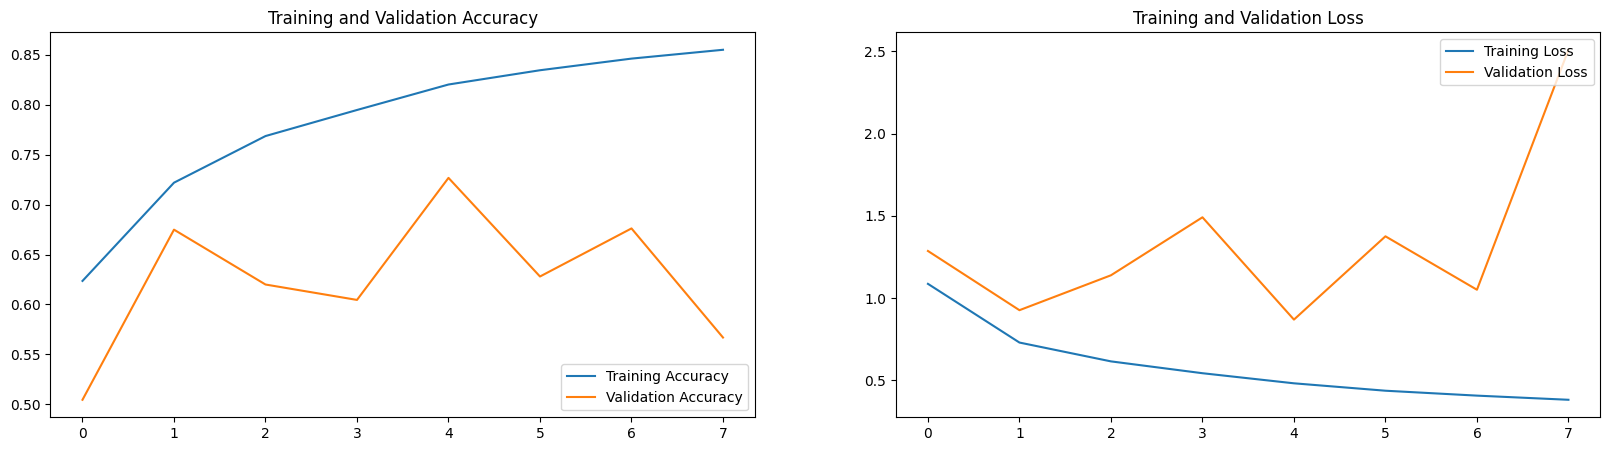

In [ ]:
def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss.

    Parameters:
    - history: A Keras History object. Contains the logs from the training process.

    Returns:
    - None. Displays the matplotlib plots for training/validation accuracy and loss.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(20, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()


plot_training_history(history)


In [ ]:
from tensorflow.keras.models import load_model
optunamodel = load_model('/content/drive/MyDrive/Colab-Notebooks/optunahipermodel.h5')

In [ ]:
test_data_generator=ImageDataGenerator(rescale=1./255,validation_split=0.2)

test_generator = test_data_generator.flow_from_dataframe(df_test,test_images,
                                                 target_size = IMAGE_SIZE,
                                                 x_col='filename',
                                                 y_col='class',
                                                 batch_size = 15,
                                                 class_mode = 'categorical')


Found 648 validated image filenames belonging to 5 classes.


44/44 [==============================] - 3s 74ms/step


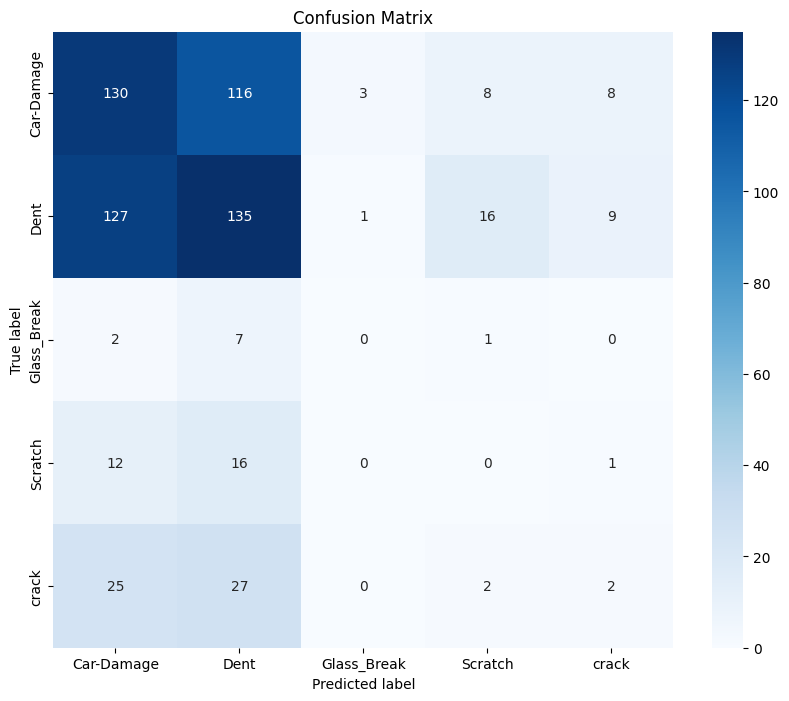

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

true_classes = test_generator.classes
predicted_classes = np.argmax(optunamodel.predict(test_generator), axis=1)
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

  Car-Damage       0.44      0.49      0.46       265
        Dent       0.45      0.47      0.46       288
 Glass_Break       0.00      0.00      0.00        10
     Scratch       0.00      0.00      0.00        29
       crack       0.10      0.04      0.05        56

    accuracy                           0.41       648
   macro avg       0.20      0.20      0.19       648
weighted avg       0.39      0.41      0.40       648



44/44 [==============================] - 3s 77ms/step


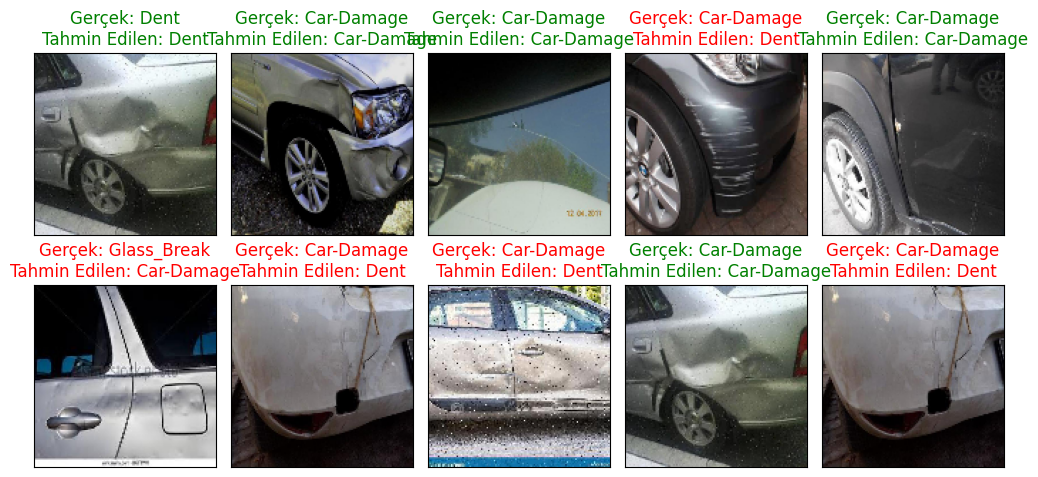

In [ ]:
# Batch boyutunu alın
batch_size = test_generator.batch_size

# Tüm test kümesi için gerçek etiketleri alın
true_classes = test_generator.classes

# Modelinizi kullanarak tüm test kümesi için etiketleri tahmin edin
predicted_classes = np.argmax(optunamodel.predict(test_generator), axis=1)

# Sınıf etiketlerini alın (Emotion_Classes ile aynı sırada olduklarını varsayarak)
class_labels = list(test_generator.class_indices.keys())

# Test kümesinden 10 rastgele indeks seçin
random_indices = np.random.randint(0, len(test_generator), 10)

# Grafiği ayarlayın
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    # Rastgele indeksleri kullanarak görüntüye ve etiketlere erişin
    test_image = test_generator[random_indices[i]][0][0]  # Batch boyutunu 1 olarak ayarlayın

    # Görüntüyü göster
    ax.imshow(test_image, cmap='gray')  # Gri tonlamalı görüntüleri varsayarak

    # Gerçek ve tahmin edilen etiketleri içeren başlığı renkli olarak ayarlayın
    true_label = class_labels[true_classes[random_indices[i]]]
    predicted_label = class_labels[predicted_classes[random_indices[i]]]
    color = "green" if true_label == predicted_label else "red"
    ax.set_title(f"Gerçek: {true_label}\nTahmin Edilen: {predicted_label}", color=color)

plt.tight_layout()
plt.show()
